# CREDIT RISK: LOAN APPROVAL

<b> The project objective is to develop a predictive model that can accurately classify loan applicants as good or bad credit risks. The model should assist the bank executives in making loan approval decisions and reduce the risk of default.</b>

The scope of the project includes the following:

* <b>Data collection and pre-processing:</b> This involves obtaining the dataset, cleaning and formatting the data, and preparing it for analysis.

* <b>Exploratory data analysis:</b> This involves understanding the data through visualization and statistical analysis.

* <b>Feature selection:</b> This involves selecting the most relevant features to be included in the predictive model.

* <b>Model development:</b> This involves building, training, and testing several machine learning models to predict credit risk.

* <b>Model evaluation and selection:</b> This involves evaluating the performance of the models and selecting the best model for deployment.

<b> The goal of the project is to develop a predictive model that can accurately classify loan applicants as good or bad credit risks with a high degree of accuracy. This will reduce the risk of default and improve the bank's profitability. </b>

<b> Data description </b>

The business meaning of each column in the data is as below

* GoodCredit: Whether the issued loan was a good decision or bad.
* checkingstatus: Status of existing checking account.
* duration: Duration of loan in months.
* history: Credit history of the applicant.
* purpose: Purpose for the loan
* amount: Credit amount
* savings: Savings account/bonds
* employ: Present employment since
* installment: Installment rate in percentage of disposable income
* status: Personal status and sex
* others: Other debtors / guarantors for the applicant
* residence: Present residence since
* property: Property type of applicant
* age: Age in years
* otherplans: Other installment plans
* housing: Housing
* cards: Number of existing credits at this bank
* job: Job
* liable: Number of people being liable to provide maintenance for
* tele: Is the Telephone registered or not
* foreign: Is the applicant a foreign worker

In [1]:
#suppressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
CreditRiskData=pd.read_csv('CreditRiskData.csv', encoding='latin')
print('Shape before deleting duplicate values:', CreditRiskData.shape)

# Removing duplicate rows if any
CreditRiskData=CreditRiskData.drop_duplicates()
print('Shape After deleting duplicate values:', CreditRiskData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
CreditRiskData.head(10)


Shape before deleting duplicate values: (1000, 21)
Shape After deleting duplicate values: (1000, 21)


,GoodCredit,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201
5,0,A14,36,A32,A46,9055,A65,A73,2,A93,...,4,A124,35,A143,A153,1,A172,2,A192,A201
6,0,A14,24,A32,A42,2835,A63,A75,3,A93,...,4,A122,53,A143,A152,1,A173,1,A191,A201
7,0,A12,36,A32,A41,6948,A61,A73,2,A93,...,2,A123,35,A143,A151,1,A174,1,A192,A201
8,0,A14,12,A32,A43,3059,A64,A74,2,A91,...,4,A121,61,A143,A152,1,A172,1,A191,A201
9,1,A12,30,A34,A40,5234,A61,A71,4,A94,...,2,A123,28,A143,A152,2,A174,1,A191,A201


### Defining the problem statement:
#### Create a Predictive model which can tell weather to approve a loan application or not?

* <b>Target Variable:</b> GoodCredit
* <b>Predictors:</b> duration, history, purpose, amount, savings etc.

* GoodCredit=1 means the loan was a good decision.
* GoodCredit=0 means the loan was a bad decision.

Based on the problem statement you can understand that we need to create a supervised ML classification model, as the target variable is categorical.

<AxesSubplot:xlabel='GoodCredit'>

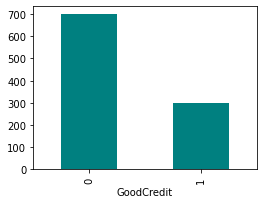

In [3]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=CreditRiskData.groupby('GoodCredit').size()
GroupedData.plot(kind='bar', figsize=(4,3), color ='teal')

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each category to learn from.

## Basic Data Exploration

In [4]:
# Observing the summarized information of data
CreditRiskData.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GoodCredit      1000 non-null   int64 
 1   checkingstatus  1000 non-null   object
 2   duration        1000 non-null   int64 
 3   history         1000 non-null   object
 4   purpose         1000 non-null   object
 5   amount          1000 non-null   int64 
 6   savings         1000 non-null   object
 7   employ          1000 non-null   object
 8   installment     1000 non-null   int64 
 9   status          1000 non-null   object
 10  others          1000 non-null   object
 11  residence       1000 non-null   int64 
 12  property        1000 non-null   object
 13  age             1000 non-null   int64 
 14  otherplans      1000 non-null   object
 15  housing         1000 non-null   object
 16  cards           1000 non-null   int64 
 17  job             1000 non-null   object
 18  liable   

In [5]:
# Looking at the descriptive statistics of the data
CreditRiskData.describe(include='all')


,GoodCredit,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
count,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,...,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000
unique,NaN,4,NaN,5,10,NaN,5,5,NaN,4,...,NaN,4,NaN,3,3,NaN,4,NaN,2,2
top,NaN,A14,NaN,A32,A43,NaN,A61,A73,NaN,A93,...,NaN,A123,NaN,A143,A152,NaN,A173,NaN,A191,A201
freq,NaN,394,NaN,530,280,NaN,603,339,NaN,548,...,NaN,332,NaN,814,713,NaN,630,NaN,596,963
mean,0.300000,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,...,2.845000,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN
std,0.458487,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,...,1.103718,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN
min,0.000000,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,...,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
25%,0.000000,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,...,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
50%,0.000000,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,...,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
75%,1.000000,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,...,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN


In [6]:
# Finging unique values for each column
CreditRiskData.nunique()

GoodCredit          2
checkingstatus      4
duration           33
history             5
purpose            10
amount            921
savings             5
employ              5
installment         4
status              4
others              3
residence           4
property            4
age                53
otherplans          3
housing             3
cards               4
job                 4
liable              2
tele                2
foreign             2
dtype: int64

## Visual Exploratory Data Analysis

In [7]:
# Plotting multiple bar charts at once for categorical variables by defining a function

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    from matplotlib import cm
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))
    
    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',color = list('rgbykymc'), ax=subPlot[plotNumber])

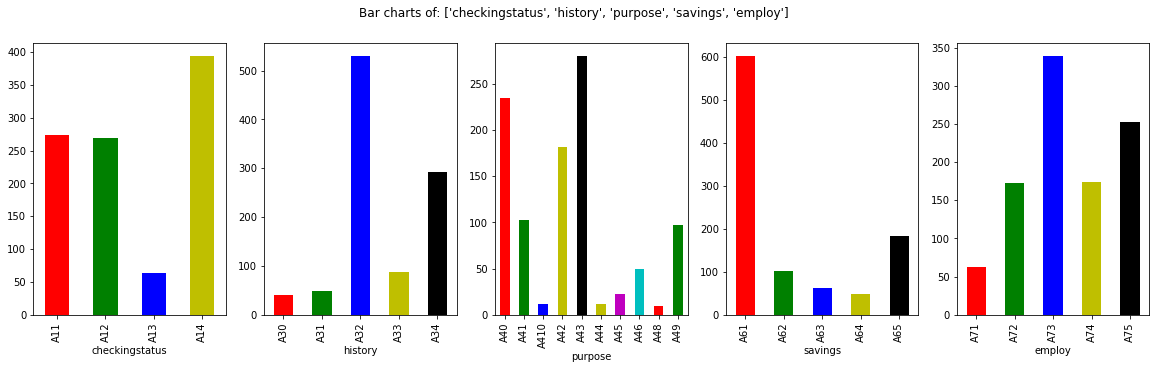

In [8]:
# Calling the function for 5 columns
PlotBarCharts(inpData=CreditRiskData, 
              colsToPlot=['checkingstatus', 'history', 'purpose','savings','employ'])


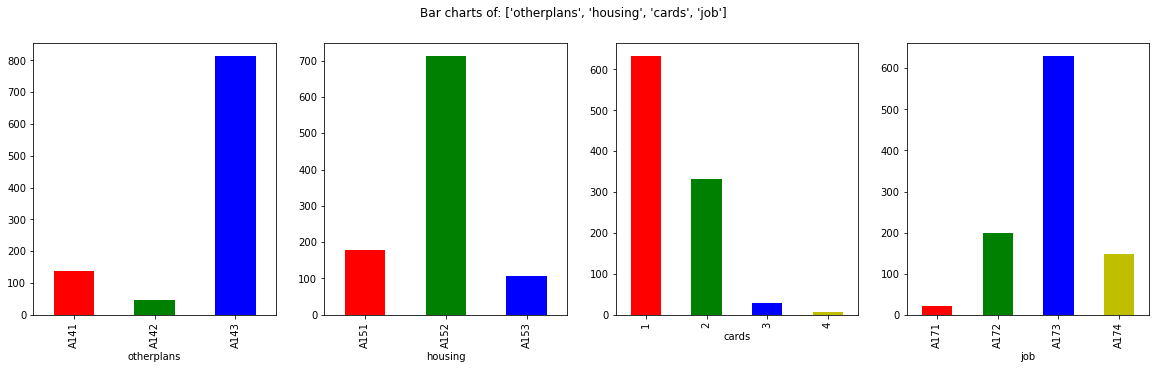

In [9]:
# Calling the function for 4 columns
PlotBarCharts(inpData=CreditRiskData, 
              colsToPlot=['otherplans', 'housing', 'cards', 'job'])

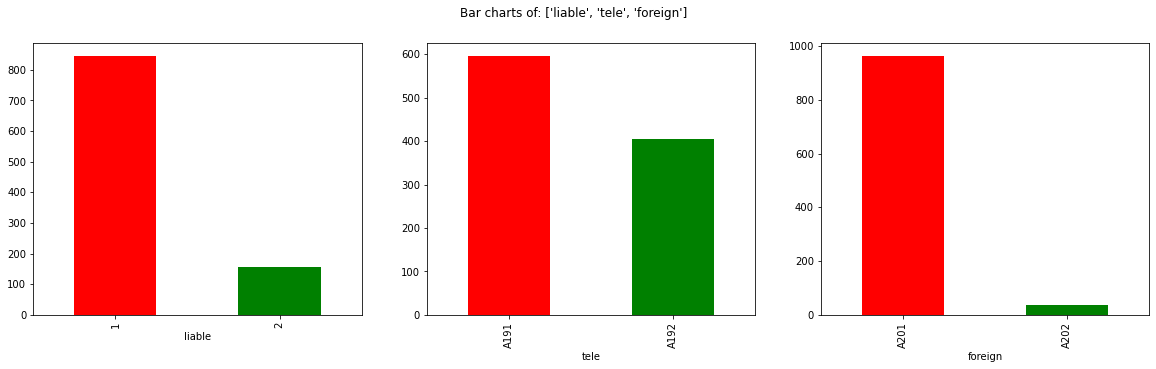

In [10]:
# Calling the function for 3 columns
PlotBarCharts(inpData=CreditRiskData, 
              colsToPlot=['liable', 'tele', 'foreign'])

<b> In this data, all the categorical columns except "foreign" and "others" have satisfactory distribution for machine learning.

* All the categorical variables are selected with a doubt on "foreign" and "others".

* Selected Categorical Variables:'checkingstatus', 'history', 'purpose','savings','employ', 'installment', 'status', 'others','residence', 'property', 'otherplans', 'housing', 'cards', 'job', 'liable', 'tele', 'foreign' </b>

### Visualizing distribution of all the Continuous Predictor variables in the data using histograms

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'amount'}>],
       [<AxesSubplot:title={'center':'duration'}>, <AxesSubplot:>]],
      dtype=object)

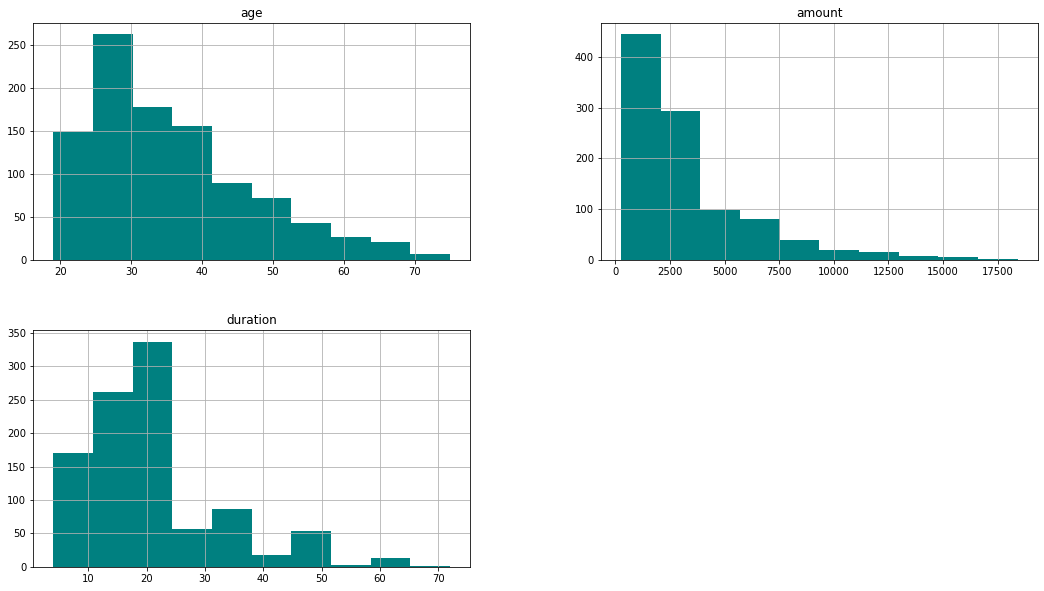

In [11]:
# Plotting histograms of multiple columns together
CreditRiskData.hist(['age', 'amount','duration'], figsize=(18,10), color ='Teal')

<b>Histogram interpretation:</b> Selected Continuous Variables based on the above histograms are presented below:

* age: Selected. Slightly skewed distribution, acceptable.
* amount: Selected. Slightly skewed distribution, acceptable.
* duration: Selected. Slightly skewed distribution, acceptable.

### Missing values treatment

In [12]:
# Finding how many missing values are there for each column
CreditRiskData.isnull().sum()

GoodCredit        0
checkingstatus    0
duration          0
history           0
purpose           0
amount            0
savings           0
employ            0
installment       0
status            0
others            0
residence         0
property          0
age               0
otherplans        0
housing           0
cards             0
job               0
liable            0
tele              0
foreign           0
dtype: int64

No missing value in this data.

## Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

## Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

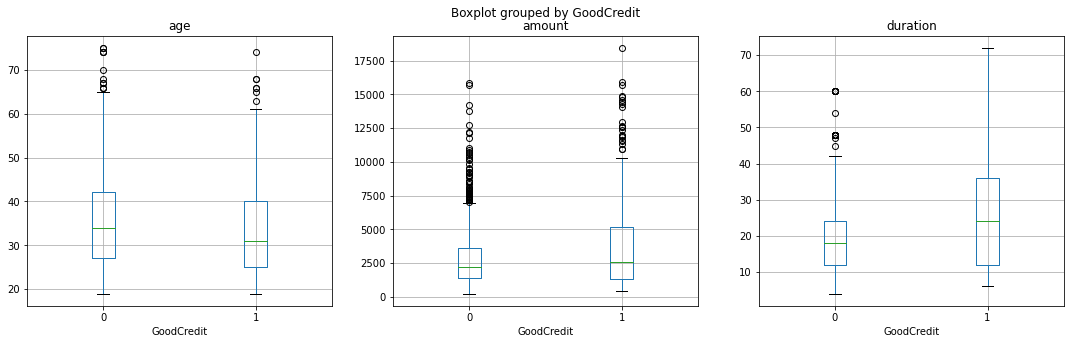

In [13]:
# Box plots for Categorical Target Variable "GoodCredit" and continuous predictors
ContinuousColsList=['age','amount', 'duration']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "GoodCredit"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    CreditRiskData.boxplot(column=PredictorCol, by='GoodCredit', figsize=(5,5), vert=True, ax=PlotCanvas[i])

<b>Box Plot Interpretation:</b> Looking at the first chart "age" Vs "GoodCredit". The boxes are in the similar line! It means that people whose loan was rejected and whose loan was approved have same kind of age. Hence, I cannot distinguish between approval and rejection based on the age of an applicant. So this column is NOT correlated with the GoodCredit.

The other other two charts also exhibit opposite characteristics, hence "amount" and "duration" are correlated with the target variable.

We confirm this by looking at the results of ANOVA test below

In [14]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [15]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['age', 'amount','duration']
FunctionAnova(inpData=CreditRiskData, TargetVariable='GoodCredit', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

age is correlated with GoodCredit | P-Value: 0.003925339398278295
amount is correlated with GoodCredit | P-Value: 8.797572373533373e-07
duration is correlated with GoodCredit | P-Value: 6.488049877187189e-12


['age', 'amount', 'duration']

<b>ANOVA Interpretation: </b> The results of ANOVA confirm our visual analysis using box plots above. The P-Value of "age", it is just at the boundry of the threshold. This also confirms with the boxplot.

<b>Conlusion:</b> ALL three columns are correlated with GoodCredit.

### Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts

When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots and statistically using Chi-square test

In [16]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=CreditRiskData['checkingstatus'], columns=CreditRiskData['GoodCredit'])
CrossTabResult

GoodCredit,0,1
checkingstatus,,
A11,139,135
A12,164,105
A13,49,14
A14,348,46


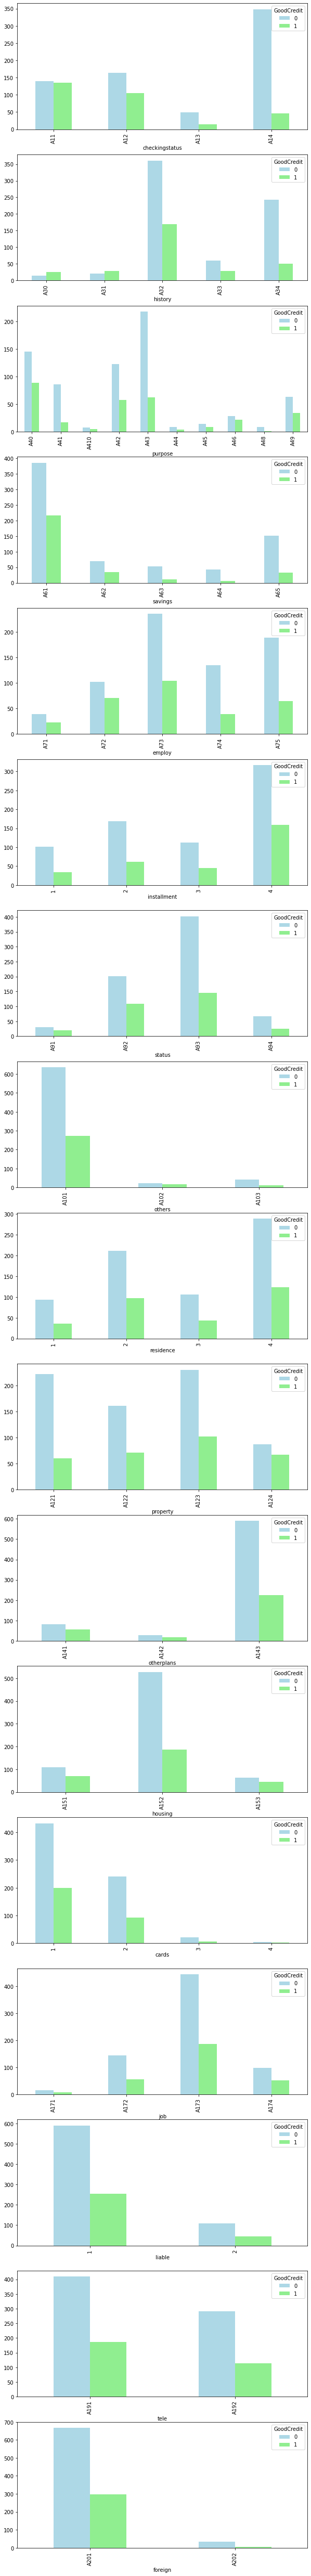

In [17]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['checkingstatus', 'history', 'purpose','savings','employ',
                     'installment', 'status', 'others','residence', 'property',
                     'otherplans', 'housing', 'cards', 'job', 'liable', 'tele', 'foreign']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,90))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "GoodCredit"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=CreditRiskData[CategoricalCol], columns=CreditRiskData['GoodCredit'])
    CrossTabResult.plot.bar(color=['lightblue','lightgreen'], ax=PlotCanvas[i])

<b> Grouped Bar charts Interpretation: </b> 
* These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. If the ratio of bars is similar across all categories, then the two columns are not correlated. 
* For example, looking at the "tele" Vs "GoodCredit" plot. The 0 vs 1 ratio for A191 is similar to A192, it means tele does not affect the Good/Bad Credit!. Hence, these two variables are not correlated.On the other hand, look at the "history" vs "GoodCredit" plot. 
* The number of Bad Credits are very high if history=A32 and A34. It means history affects the Good/Bad Credit! Hence, two columns are correlated with each other.
* To confirm this analysis performing Chi-Square Tests.

Based on the results of Chi-Square test, below categorical columns are selected as predictors for Machine Learning

'checkingstatus', 'history', 'purpose', 'savings', 'employ', 'status', 'others', 'property', 'otherplans', 'housing', 'foreign'

### Selecting final predictors for Machine Learning


In [18]:
SelectedColumns=['checkingstatus','history','purpose','savings','employ',
 'status','others','property','otherplans','housing','foreign',
 'age', 'amount', 'duration']

# Selecting final columns
DataForML=CreditRiskData[SelectedColumns]
DataForML.head()

,checkingstatus,history,purpose,savings,employ,status,others,property,otherplans,housing,foreign,age,amount,duration
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A201,67,1169,6
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A201,22,5951,48
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A201,49,2096,12
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A201,45,7882,42
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A201,53,4870,24


In [19]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

### Converting Ordinal variables to numeric using business mapping

In [20]:
# Treating the Ordinal variable first
DataForML['employ'].replace({'A71':1, 'A72':2,'A73':3, 'A74':4,'A75':5 }, inplace=True)

### Converting the binary nominal variable to numeric using 1/0 mapping

In [21]:
# Treating the binary nominal variable
DataForML['foreign'].replace({'A201':1, 'A202':0}, inplace=True)

# Looking at data after nominal treatment
DataForML.head()


,checkingstatus,history,purpose,savings,employ,status,others,property,otherplans,housing,foreign,age,amount,duration
0,A11,A34,A43,A65,5,A93,A101,A121,A143,A152,1,67,1169,6
1,A12,A32,A43,A61,3,A92,A101,A121,A143,A152,1,22,5951,48
2,A14,A34,A46,A61,4,A93,A101,A121,A143,A152,1,49,2096,12
3,A11,A32,A42,A61,4,A93,A103,A122,A143,A153,1,45,7882,42
4,A11,A33,A40,A61,3,A93,A101,A124,A143,A153,1,53,4870,24


### Converting nominal variables to numeric using get_dummies()

In [22]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['GoodCredit']=CreditRiskData['GoodCredit']

# Printing sample rows
DataForML_Numeric.head()

,employ,foreign,age,amount,duration,checkingstatus_A11,checkingstatus_A12,checkingstatus_A13,checkingstatus_A14,history_A30,...,property_A122,property_A123,property_A124,otherplans_A141,otherplans_A142,otherplans_A143,housing_A151,housing_A152,housing_A153,GoodCredit
0,5,1,67,1169,6,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,3,1,22,5951,48,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,4,1,49,2096,12,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3,4,1,45,7882,42,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,3,1,53,4870,24,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1


### Machine Learning: Splitting the data into Training and Testing sample

In [23]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['employ', 'foreign', 'age', 'amount', 'duration', 'checkingstatus_A11',
       'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
       'history_A30', 'history_A31', 'history_A32', 'history_A33',
       'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61',
       'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
       'status_A91', 'status_A92', 'status_A93', 'status_A94', 'others_A101',
       'others_A102', 'others_A103', 'property_A121', 'property_A122',
       'property_A123', 'property_A124', 'otherplans_A141', 'otherplans_A142',
       'otherplans_A143', 'housing_A151', 'housing_A152', 'housing_A153',
       'GoodCredit'],
      dtype='object')

In [24]:
# Separate Target Variable and Predictor Variables
TargetVariable='GoodCredit'
Predictors=['employ', 'foreign', 'age', 'amount', 'duration', 'checkingstatus_A11',
       'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
       'history_A30', 'history_A31', 'history_A32', 'history_A33',
       'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61',
       'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
       'status_A91', 'status_A92', 'status_A93', 'status_A94', 'others_A101',
       'others_A102', 'others_A103', 'property_A121', 'property_A122',
       'property_A123', 'property_A124', 'otherplans_A141', 'otherplans_A142',
       'otherplans_A143', 'housing_A151', 'housing_A152', 'housing_A153']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

## Logistic Regression

In [25]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithmd
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       208
           1       0.69      0.45      0.54        92

    accuracy                           0.77       300
   macro avg       0.74      0.68      0.69       300
weighted avg       0.76      0.77      0.75       300

[[190  18]
 [ 51  41]]
Accuracy of the model on Testing Sample Data: 0.75

Accuracy values for 10-fold Cross Validation:
 [0.77781287 0.68       0.72238245 0.73549151 0.76028751 0.82631579
 0.63522013 0.78407524 0.78113208 0.77519841]

Final Average Accuracy of the model: 0.75


## Decision Trees

DecisionTreeClassifier(max_depth=4)
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       208
           1       0.52      0.52      0.52        92

    accuracy                           0.71       300
   macro avg       0.66      0.66      0.66       300
weighted avg       0.71      0.71      0.71       300

[[164  44]
 [ 44  48]]
Accuracy of the model on Testing Sample Data: 0.71

Accuracy values for 10-fold Cross Validation:
 [0.73734823 0.68       0.7343254  0.65257937 0.66798419 0.64715447
 0.70133333 0.72       0.71433083 0.70133333]

Final Average Accuracy of the model: 0.7


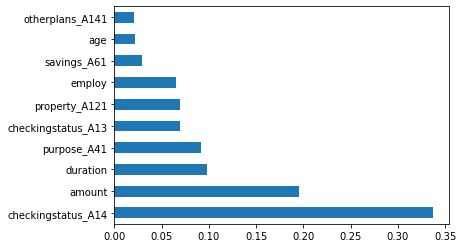

In [26]:
#Decision Trees
from sklearn import tree
# choose from different tunable hyper parameters
# Choose various values of max_depth and criterion for tuning the model
clf = tree.DecisionTreeClassifier(max_depth=4,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

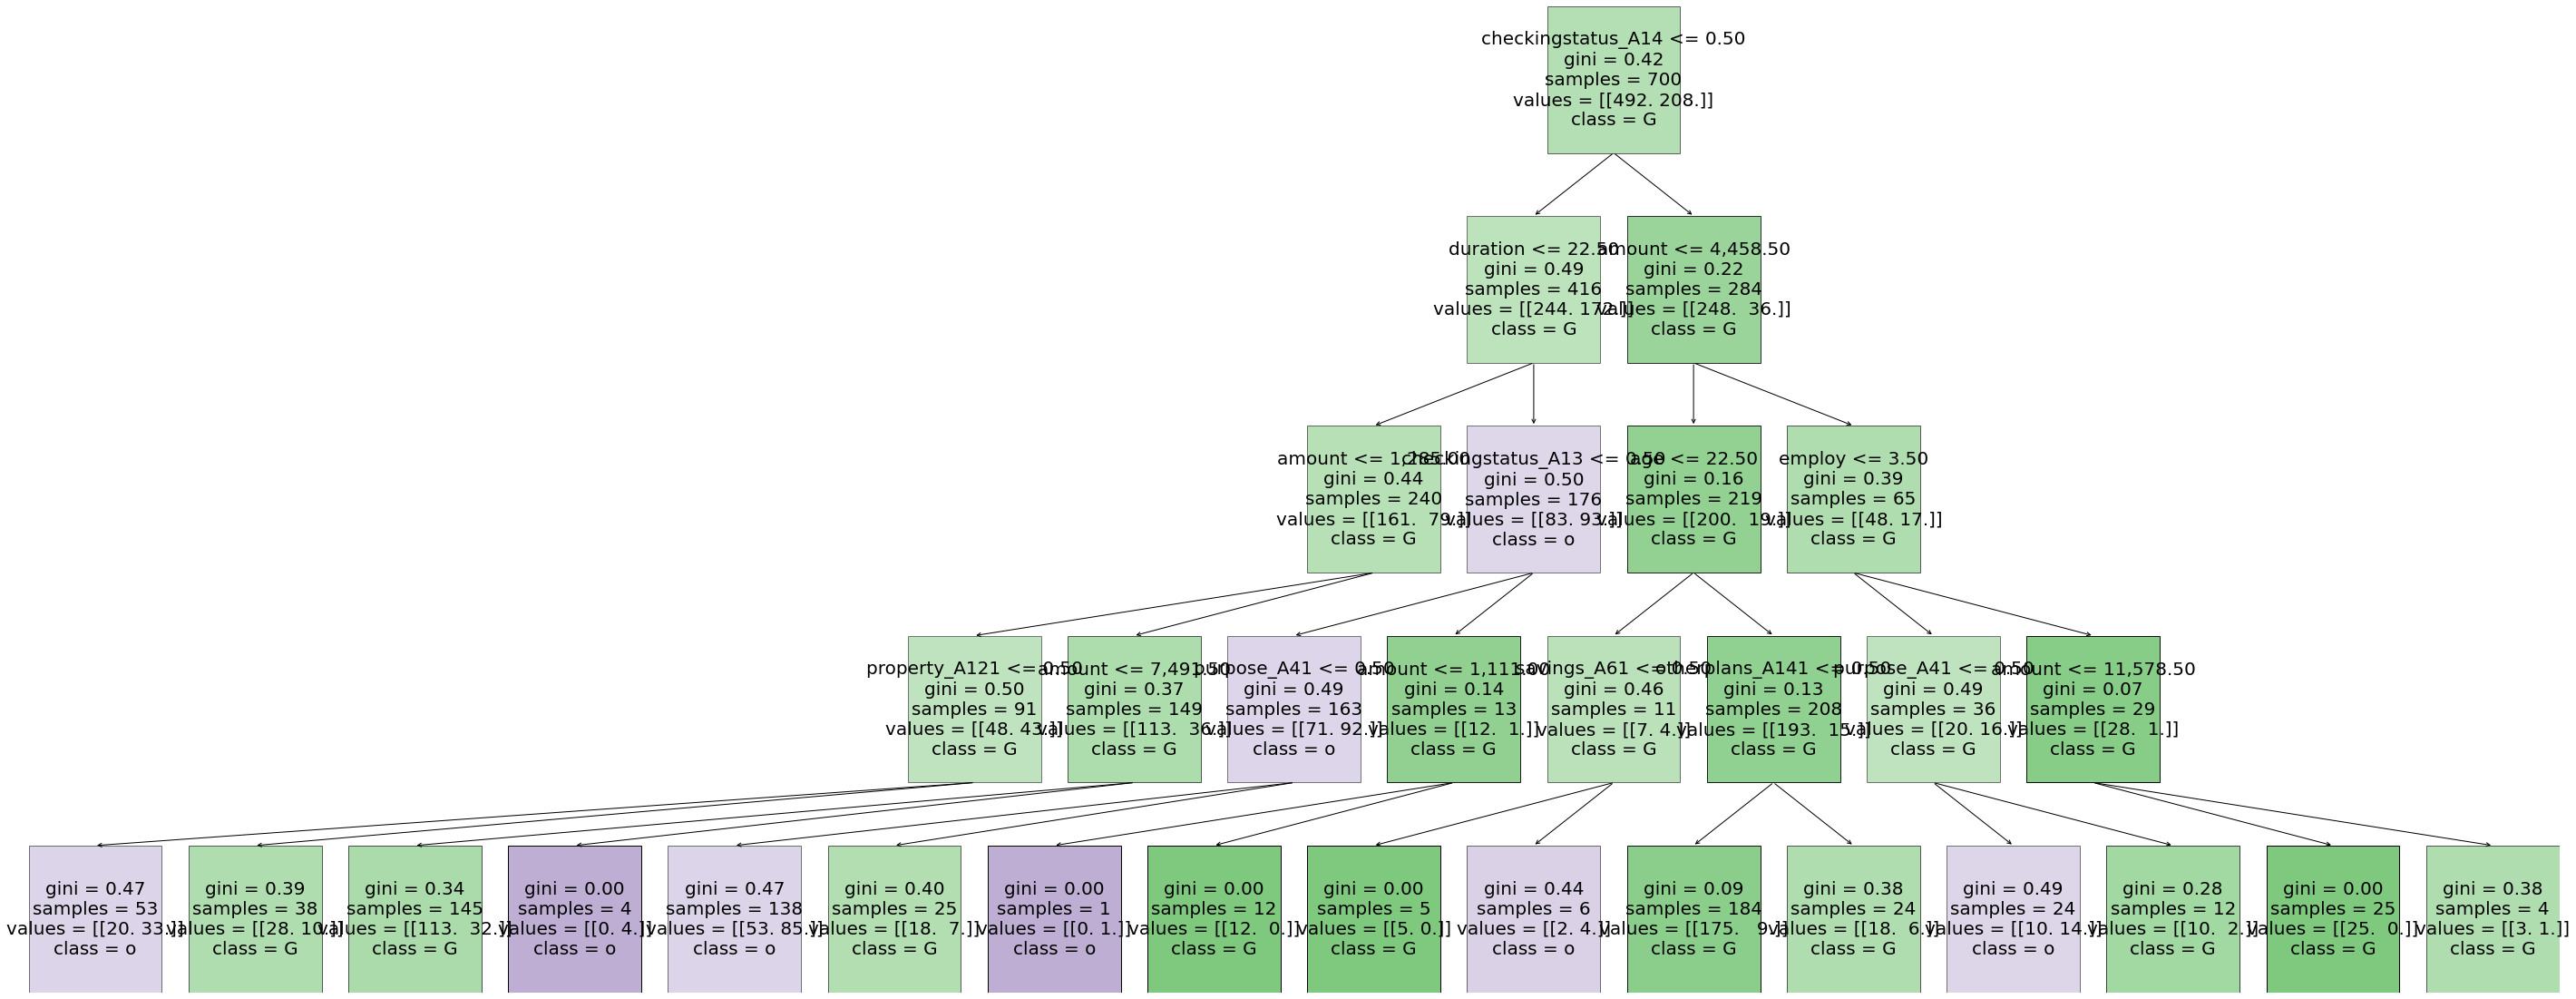

In [27]:
from dtreeplt import dtreeplt
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(50,20)
# Double click on the graph to zoom in

## Random Forest

RandomForestClassifier(max_depth=10)
              precision    recall  f1-score   support

           0       0.75      0.94      0.84       208
           1       0.68      0.30      0.42        92

    accuracy                           0.74       300
   macro avg       0.72      0.62      0.63       300
weighted avg       0.73      0.74      0.71       300

[[195  13]
 [ 64  28]]
Accuracy of the model on Testing Sample Data: 0.71

Accuracy values for 10-fold Cross Validation:
 [0.82933333 0.70606061 0.74294671 0.73438735 0.73438735 0.69899666
 0.68344988 0.78289474 0.68221388 0.73944295]

Final Average Accuracy of the model: 0.73


<AxesSubplot:>

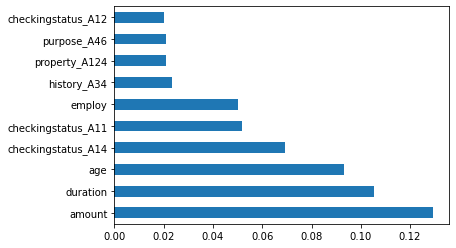

In [28]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose various values of max_depth, n_estimators and criterion for tuning the model
clf = RandomForestClassifier(max_depth=10, n_estimators=100,criterion='gini')


# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

### Sandardization of data

In [29]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Support Vector Machines(SVM)

In [30]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=2, kernel='rbf', gamma=0.1)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

SVC(C=2, gamma=0.1)
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       209
           1       0.61      0.42      0.50        91

    accuracy                           0.74       300
   macro avg       0.70      0.65      0.66       300
weighted avg       0.73      0.74      0.73       300

[[185  24]
 [ 53  38]]
Accuracy of the model on Testing Sample Data: 0.73

Accuracy values for 10-fold Cross Validation:
 [0.76987902 0.69775382 0.73089802 0.76533333 0.77229833 0.76118421
 0.70133333 0.80197664 0.79002079 0.74604343]

Final Average Accuracy of the model: 0.75


### Deployment of the Model

Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

I am choosing SVM as the final model since it is very fast on this high dimensional data.

#### Choosing only the most important variables
Its beneficial to keep lesser number of predictors for the model while deploying it in production. The lesser predictors you keep, the better because, the model will be less dependent hence, more stable.This is important specially when the data is high dimensional(too many predictor columns).

In this data, the most important predictor variables are 'employ', 'age', 'amount', 'duration','checkingstatus', 'history', 'purpose', 'savings', and 'status'. As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables.

In [31]:
# Separate Target Variable and Predictor Variables
TargetVariable='GoodCredit'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['employ', 'age', 'amount', 'duration','checkingstatus_A11',
       'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
       'history_A30', 'history_A31', 'history_A32', 'history_A33',
       'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49','savings_A61',
       'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
       'status_A91', 'status_A92', 'status_A93', 'status_A94']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(1000, 32)
(1000,)


### Step:1 Using the 100% data to retrain the model

In [32]:
# Using the SVM algorithm with final hyperparamters
from sklearn import svm
clf = svm.SVC(C=4, kernel='rbf', gamma=0.1)

# Training the model on 100% Data available
Final_SVM_Model=clf.fit(X,y)

#### Cross validating the final model accuracy with less predictors

In [33]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(Final_SVM_Model, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.795594   0.68       0.72238245 0.72867133 0.73089802 0.77407758
 0.66879756 0.80197664 0.73104474 0.74802495]

Final Average Accuracy of the model: 0.74


### Step 2. Save the model as a serialized file which can be stored anywhere

In [34]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final Model
with open('Final_SVM_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_SVM_Model, fileWriteStream)
    # close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\Priya


### Step 3. Create a python function

In [35]:
# This Function can be called from any from any front end tool/website
def PredictLoanStatus(InputLoanDetails):
    import pandas as pd
    Num_Inputs=InputLoanDetails.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputLoanDetails=InputLoanDetails.append(DataForML)
    
    # Treating the Ordinal variable first
    InputLoanDetails['employ'].replace({'A71':1, 'A72':2,'A73':3, 'A74':4,'A75':5 }, inplace=True)
    
    # Generating dummy variables for rest of the nominal variables
    InputLoanDetails=pd.get_dummies(InputLoanDetails)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['employ', 'age', 'amount', 'duration','checkingstatus_A11',
       'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
       'history_A30', 'history_A31', 'history_A32', 'history_A33',
       'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49','savings_A61',
       'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
       'status_A91', 'status_A92', 'status_A93', 'status_A94']
    
    # Generating the input values to the model
    X=InputLoanDetails[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('Final_SVM_Model.pkl', 'rb') as fileReadStream:
        SVM_model=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=SVM_model.predict(X)
    PredictedStatus=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictedStatus)

In [36]:
# Calling the function for some loan applications manually
NewLoanApplications=pd.DataFrame(
    data=[['A73',22,5951,48,'A12','A32','A43','A61','A92'],
          ['A72',40,8951,24,'A12','A32','A43','A61','A92']],
    
    columns=['employ', 'age', 'amount', 'duration','checkingstatus', 
             'history', 'purpose', 'savings','status'])

print(NewLoanApplications)

# Calling the Function for prediction
PredictLoanStatus(InputLoanDetails= NewLoanApplications)

  employ  age  amount  duration checkingstatus history purpose savings status
0    A73   22    5951        48            A12     A32     A43     A61    A92
1    A72   40    8951        24            A12     A32     A43     A61    A92


,Predicted Status
0,1
1,0


The Function PredictLoanStatus can be used to produce the predictions for one or more loan applications at a time. Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the loan applications available in the system.

### Function for predictions API

In [37]:
# Creating the function which can take loan inputs and perform prediction
def FunctionLoanPrediction(inp_employ, inp_age , inp_amount, inp_duration,
                           inp_checkingstatus,inp_history, inp_purpose, 
                           inp_savings, inp_status):
    SampleInputData=pd.DataFrame(
     data=[[inp_employ, inp_age , inp_amount, inp_duration,
           inp_checkingstatus,inp_history, inp_purpose, inp_savings, inp_status]],
     columns=['employ', 'age', 'amount', 'duration','checkingstatus', 
         'history', 'purpose', 'savings','status'])

    # Calling the function defined above using the input parameters
    Predictions=PredictLoanStatus(InputLoanDetails= SampleInputData)

    # Returning the predicted loan status
    return(Predictions.to_json())

# Function call
FunctionLoanPrediction(inp_employ='A73', 
                       inp_age= 22, 
                       inp_amount=5951,
                       inp_duration=48,
                       inp_checkingstatus='A12',
                       inp_history='A32',
                       inp_purpose='A43',
                       inp_savings='A61',
                       inp_status='A92')

'{"Predicted Status":{"0":1}}'

### Creating Flask API

In [38]:
from flask import Flask,request,jsonify
import pickle
import pandas as pd
import numpy

In [39]:
app = Flask(__name__)

@app.route('/get_loan_prediction', methods=["GET"])
def get_loan_prediction():
    try:
        # Getting the paramters from API call
        employ_value = request.args.get('employ')
        age_value = float(request.args.get('age'))
        amount_value=float(request.args.get('amount'))
        duration_value=float(request.args.get('duration'))
        checkingstatus_value=request.args.get('checkingstatus')
        history_value=request.args.get('history')
        purpose_value=request.args.get('purpose')
        savings_value=request.args.get('savings')
        status_value=request.args.get('PropertyArea')
                
        # Calling the funtion to get loan approval status
        prediction_from_api=FunctionLoanPrediction(
                       inp_employ=employ_value, 
                       inp_age= age_value, 
                       inp_amount=amount_value,
                       inp_duration=duration_value,
                       inp_checkingstatus=checkingstatus_value,
                       inp_history=history_value,
                       inp_purpose=purpose_value,
                       inp_savings=savings_value,
                       inp_status=status_value)

        return (prediction_from_api)
    
    except Exception as e:
        return('Something is not right!:'+str(e))

### Starting the API engine

In [41]:
import os
if __name__ =="__main__":
    
    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=8080, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:8080/ (Press CTRL+C to quit)
127.0.0.1 - - [26/Feb/2023 22:33:53] "GET /get_loan_prediction?employ=A73&age=22&amount=9951&duration=48&checkingstatus=A12&history=A32&purpose=A43&savings=A61&status=A92 HTTP/1.1" 200 -
127.0.0.1 - - [26/Feb/2023 22:34:06] "GET /get_loan_prediction?employ=A73&age=24&amount=9951&duration=78&checkingstatus=A12&history=A32&purpose=A43&savings=A61&status=A92 HTTP/1.1" 200 -
127.0.0.1 - - [26/Feb/2023 22:34:15] "GET /get_loan_prediction?employ=A73&age=24&amount=951&duration=78&checkingstatus=A12&history=A32&purpose=A43&savings=A61&status=A92 HTTP/1.1" 200 -
127.0.0.1 - - [26/Feb/2023 22:34:22] "GET /get_loan_prediction?employ=A73&age=2&amount=951&duration=78&checkingstatus=A12&history=A32&purpose=A43&savings=A61&status=A92 HTTP/1.1" 200 -


## Sample URL to call the API
Copy and paste below URL in the web browser
http://127.0.0.1:8080/get_loan_prediction?employ=A73&age=22&amount=9951&duration=48&checkingstatus=A12&history=A32&purpose=A43&savings=A61&status=A92

This URL can be called by any front end application like Java, Tableau etc. Once the parameters are passed to it, the predictions will be generated.